(Current Project ... In progress)

In [532]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as r

In [533]:
# loading the MNIST dataset
file = np.loadtxt(r'C:\Users\ANUNAY CHANDRA\Desktop\ML-from-scratch\ML\CNN\archive\mnist_test.csv',delimiter=',',skiprows=1)
y = file[:,0]
X_flat = file[:,1:]

In [534]:
# function to convert flattened MNIST array to a matrix (gray-scale image)
def make_image(arr):
    arr = np.array(arr)
    img = []
    N = 28
    for i in range(N):
        img.append(arr[N*i:N*i+N])
    return np.array(img)

In [535]:
# using X_flat to get images (stored in X)
X = []
for x in X_flat:
    X.append(make_image(x))
X = np.array(X)

In [536]:
print(f'Shape of X_flat : {np.shape(X_flat)}')
print(f'Shape of X : {np.shape(X)}')

Shape of X_flat : (10000, 784)
Shape of X : (10000, 28, 28)


Building the CNN architecture :

1. Input Layer : (takes the MNIST 28x28 pixel image)
2. First Convolution (relu activation, two 5x5 kernels, 24x24 pixel image) -> Max Pooling (two 12x12 pixel images)
3. Second Convolution (relu activation, four two-channel 3x3 kernels, 10x10 pixel image) -> Maxpooling (four 5x5 pixel images)
4. Flattening : (100 cell 1D-array)
5. Normalizing the flattened array
6. Dense Neural Network : Input Layer (NN) -> Hidden Layer -> Output Layer

In [537]:
# ReLU function
def relu(x):
    return np.maximum(0,x)

In [538]:
# convolution functions
def conv1(img,filters,filter_biases):
    img_dim = len(img)                         # dimension of the image
    N = len(filters)                           # no. of filters
    filter_dim = len(filters[0])               # dimension of the filters
    conv_img_arr = []
    R_arr = []
    iter = img_dim-filter_dim+1
    for k in range(N):
        filter = filters[k]
        bias = filter_biases[k]
        conv_img = []
        R_img = []
        for i in range(iter):
            conv_img_row = []
            R_row = []
            for j in range(iter):
                R = np.sum(filter*img[i:i+filter_dim,j:j+filter_dim])+bias
                conv_img_row.append(relu(R))
                R_row.append(R)
            conv_img.append(conv_img_row)
            R_img.append(R_row)
        conv_img_arr.append(conv_img)
        R_arr.append(R_img)
    return np.array(R_arr), np.array(conv_img_arr)

def conv2(imgs,filters,bias):
    # number of images = number of filters in the first convolutional layer
    N = len(imgs)
    conv_img = []
    R_arr = []
    img_dim = len(imgs[0])
    filter_dim = len(filters[0])
    iter = img_dim-filter_dim+1
    for i in range(iter):
        conv_img_row = []
        R_row = []
        for j in range(iter):
            temp_arr = []
            for k in range(N):
                img = imgs[k]
                filter = filters[k]
                temp_arr.append(filter*img[i:i+filter_dim,j:j+filter_dim])
            R = np.sum(np.array(temp_arr))+bias
            conv_img_row.append(relu(R))
            R_row.append(R)
        R_arr.append(R_row)
        conv_img.append(conv_img_row)
    return np.array(R_arr), np.array(conv_img)

# maxpool function
def maxpool(img,pool_size = 2):
    # note that I am using the strize length = pool size in this NN architecture
    iter = int(len(img)/pool_size)
    pooled_img = []
    for i in range(iter):
        pooled_img_row = []
        for j in range(iter):
            pooled_img_row.append(np.max(img[pool_size*i:pool_size*i+pool_size,pool_size*j:pool_size*j+pool_size]))
        pooled_img.append(pooled_img_row)
    return np.array(pooled_img)

# kronecker delta
def kronecker_delta(i,j):
    if i==j:
        return 1
    else:
        return 0

# softmax function
def softmax(v):
    # takes vector v as input
    temp = np.exp(v-np.max(v))
    return temp/np.sum(temp)

# forward feeding for dense NN
def forward_feed_NN(a0,w,b):
    Z1 = np.matmul(w.T,a0)+b
    a1 = relu(Z1)
    return Z1, a1, softmax(a1)

# loss/cost function
def loss(y_true,y_pred):
    return -np.sum(y_true*np.log(y_pred))

(2, 24, 24)


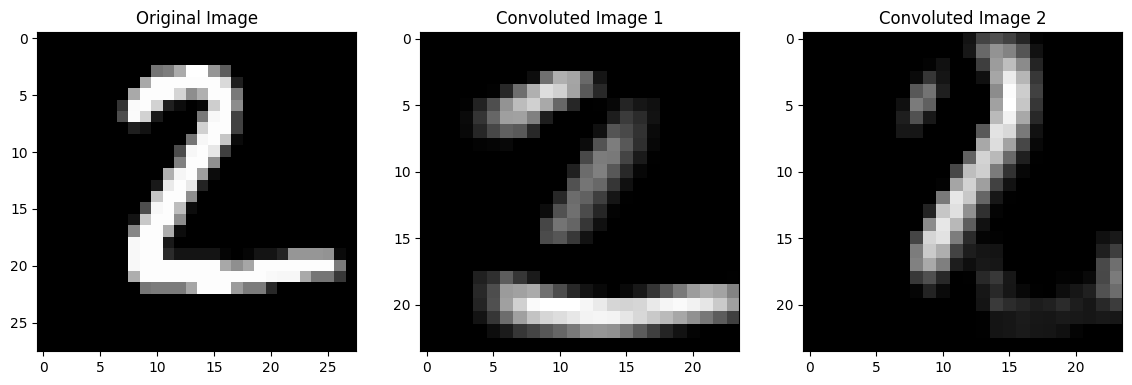

In [539]:
# testing the first conv function
filter1 = np.array([[2,2,4,2,2],[1,1,2,1,1],[0,0,0,0,0],[-1,-1,-2,-1,-1],[-2,-2,-4,-2,-2]])
filter2 = filter1.T
filters_5x5 = np.array([filter1,filter2])
img_index = 1
_,conv1_img = conv1(X[img_index],filters_5x5,[0,0])
print(np.shape(conv1_img))
plt.figure(figsize = (14,5))
plt.subplot(1,3,1)
plt.title('Original Image')
plt.imshow(X[img_index],cmap = 'gray')
plt.subplot(1,3,2)
plt.title('Convoluted Image 1')
plt.imshow(conv1_img[0],cmap = 'gray')
plt.subplot(1,3,3)
plt.title('Convoluted Image 2')
plt.imshow(conv1_img[1],cmap = 'gray')
plt.show()

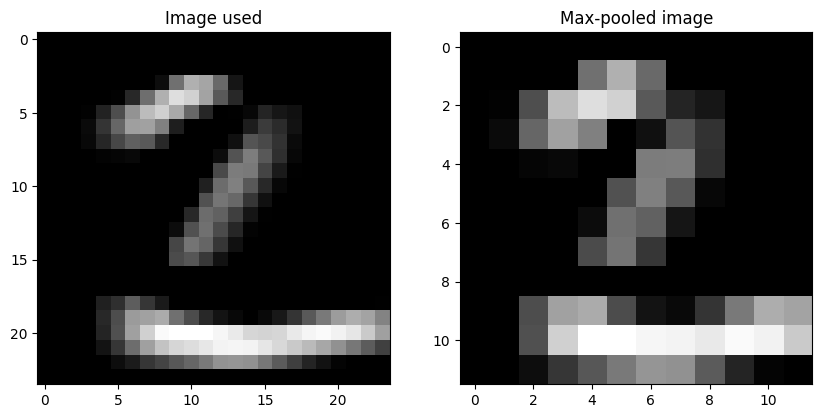

In [540]:
# testing the max-pool function
index = 0
pooled_img = maxpool(conv1_img[index])
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.imshow(conv1_img[index],cmap = 'gray')
plt.title('Image used')
plt.subplot(1,2,2)
plt.imshow(pooled_img,cmap = 'gray')
plt.title('Max-pooled image')
plt.show()

Shape of the conv2 image : (10, 10, 1)


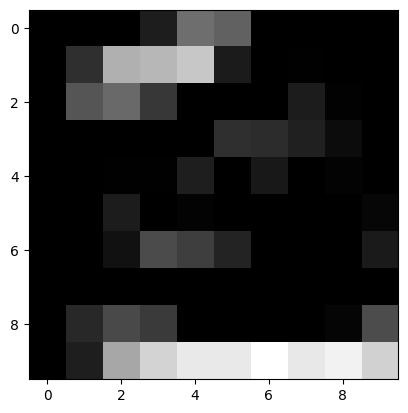

In [541]:
# testing the second convolution function
filter3,filter4,filter5,filter6 = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]]),np.array([[1,0,-1],[0,0,0],[-1,0,1]]),np.array([[1,2,1],[0,0,0],[-1,0,-2]]),np.array([[1,2,1],[0,0,0],[-1,0,-2]]).T
filters_3x3 = np.array([[filter3,filter4],[filter5,filter6],[filter5,filter6],[filter5,filter6]])
img1,img2 = maxpool(conv1_img[0]),maxpool(conv1_img[1])
imgs = np.array([img1,img2])
_,conv2_img = conv2(imgs,filters_3x3[0],[0])
print(f'Shape of the conv2 image : {np.shape(conv2_img)}')
plt.imshow(conv2_img,cmap='gray')
plt.show()

In [542]:
# forward feeding
def forward_feeding(img,filters_layer_1,filters_layer_2,bias_layer_1,bias_layer_2,w,b):
    # first layer feeding
    R_arr_1, conv_imgs_1 = conv1(img,filters_layer_1,bias_layer_1)
    
    # first maxpooling
    pooled_imgs_1 = []
    n1 = len(conv_imgs_1)                                            # this shall also be equal to the number of filters in the first convolution step
    for i in range(n1):
        pooled_imgs_1.append(maxpool(conv_imgs_1[i]))
    pooled_imgs_1 = np.array(pooled_imgs_1)
    
    # second layer feeding
    conv_imgs_2 = []    
    R_arr_2 = []    
    n2 = len(bias_layer_2)
    for i in range(n2):
        temp = conv2(pooled_imgs_1,filters_layer_2[i],bias_layer_2[i])
        R_arr_2.append(temp[0])
        conv_imgs_2.append(temp[1])
    R_arr_2 = np.array(R_arr_2)
    conv_imgs_2 = np.array(conv_imgs_2)

    # second maxpooling
    pooled_imgs_2 = []
    n2 = len(conv_imgs_2)
    for i in range(n2):
        pooled_imgs_2.append(maxpool(conv_imgs_2[i]))
    pooled_imgs_2 = np.array(pooled_imgs_2)
    
    # flattening and concattening the image matrices
    a0_unnorm = np.array([])
    s = len(pooled_imgs_2[0])
    for i in range(len(pooled_imgs_2)):
        vec_single = np.reshape(pooled_imgs_2[i],(s*s,))
        a0_unnorm = np.append(a0_unnorm,vec_single)

    # normalising the the vector
    a0_norm = a0_unnorm/np.max(a0_unnorm)

    # feeding into dense neural network
    Z1, a1, y_pred_vec = forward_feed_NN(a0_norm,w,b)
    # shape of w : 100x10
    # shape of b : 10
    return R_arr_1, conv_imgs_1, pooled_imgs_1, R_arr_2, conv_imgs_2, pooled_imgs_2, a0_unnorm, a0_norm, Z1, a1, y_pred_vec

In [543]:
# _,_,_,R_arr_2,conv_imgs_2,_,_,_,_,_,pred_prob = forward_feeding(X[1],filters_5x5,filters_3x3,[0,0],[0,0,0,0],r.standard_normal((100,10)),r.standard_normal(10))
# print(np.shape(pred_prob))
# print(pred_prob,np.sum(pred_prob))
# print(loss(np.array([1,0,0,0,0,0,0,0,0,0]),pred_prob))
# print(loss(np.array([0,1,0,0,0,0,0,0,0,0]),pred_prob))
# print(loss(np.array([0,0,1,0,0,0,0,0,0,0]),pred_prob))
# print(loss(np.array([0,0,0,1,0,0,0,0,0,0]),pred_prob))
# print(loss(np.array([0,0,0,0,1,0,0,0,0,0]),pred_prob))
# print(loss(np.array([0,0,0,0,0,1,0,0,0,0]),pred_prob))
# print(loss(np.array([0,0,0,0,0,0,1,0,0,0]),pred_prob))
# print(loss(np.array([0,0,0,0,0,0,0,1,0,0]),pred_prob))
# print(loss(np.array([0,0,0,0,0,0,0,0,1,0]),pred_prob))
# print(loss(np.array([0,0,0,0,0,0,0,0,0,1]),pred_prob))

Loss Function : I used the cross-entropy loss function

$$ L = -\sum_{i=1}^{10} y_i\ln\hat{y}_i $$

In [544]:
# Backpropagation
def all_gradients(R_arr_1, conv_imgs_1, pooled_imgs_1, R_arr_2, conv_imgs_2, pooled_imgs_2, a0_unnorm, a0_norm, Z1, a1, y_pred_vec, y_true, img, filters_layer_1, filters_layer_2, bias_layer_1, bias_layer_2, w, b):
    # dLdb : biases (hidden layer)
    dLdb = (y_pred_vec-y_true)*np.heaviside(Z1,0)

    # dLdw : weights (hidden layer)
    dLdw = np.outer(a0_norm,dLdb)
    
    # dLda : input activations (input layer)
    dLda = np.matmul(w,dLdb)
    
    # dLdR_m[2] : w.r.t R_m[2] where C_m[2] = relu(R_m[2])
    dLdR_m2_arr = []
    for m in range(4):
        dLdR_m2 = np.zeros((10,10),float)
        C_m2 = conv_imgs_2[m]
        M_m2 = pooled_imgs_2[m]
        R_m2 = R_arr_2[m]
        for i in range(10):
            for j in range(10):
                u,v = int(i/2),int(j/2)
                dLdR_m2[i][j] = kronecker_delta(C_m2[i,j],M_m2[u,v])*np.heaviside(R_m2[i,j],0)/np.max(a0_unnorm)*(dLda[5*u+v+25*m]-a0_norm[5*u+v+25*m]*dLda[np.argmax(a0_unnorm)])
        dLdR_m2_arr.append(dLdR_m2)
    dLdR_m2_arr = np.array(dLdR_m2_arr)

    # dLdB_m[2] : biases (2nd convolutional layer kernels)
    dLdB_m2 = np.zeros((4,),float)
    for m in range(4):
        dLdB_m2[m] = np.sum(dLdR_m2_arr[m])

    # dLdK_mn[2] : weights (2nd layer kernels/filters)
    dLdK_mn2_arr = []
    for m in range(4):
        dLdK_m2 = []
        for n in range(2):
            dLdK_mat = np.zeros((3,3),float)
            for i in range(3):
                for j in range(3):
                    mat1 = dLdR_m2_arr[m]
                    mat2 = pooled_imgs_1[n]
                    dLdK_mat[i][j] = np.sum(mat1*mat2[i:i+10,j:j+10])
            dLdK_m2.append(dLdK_mat)
        dLdK_mn2_arr.append(dLdK_m2)
    dLdK_mn2_arr = np.array(dLdK_mn2_arr)

    # dLdM_n[1] : w.r.t. maxpooling layer 1
    # dLdM_n1 = []
    # for n in range(2):
    #     dLdM_n1_mat = np.zeros((12,12),float)
    #     for p in range(12):
    #         for q in range(12):
    #             temp = 0.0
    #             for r in range(3):
    #                 for s in range(3):
    #                     print(np.shape(dLdR_m2_arr))
    #                     temp += dLdR_m2_arr[0][p-r][q-s]*filters_layer_2[0][n][r,s]+dLdR_m2_arr[1][p-r][q-s]*filters_layer_2[1][n][r,s]+dLdR_m2_arr[2][p-r][q-s]*filters_layer_2[2][n][r,s]+dLdR_m2_arr[3][p-r][q-s]*filters_layer_2[3][n][r,s]
    #             dLdM_n1_mat[p][q] += temp
    #     dLdM_n1.append(dLdM_n1_mat)
    # dLdM_n1 = np.array(dLdM_n1)

    # dLdM_n[1] : w.r.t. maxpooling layer 1
    dLdM_n1 = []
    for n in range(2):
        dLdM_n1_single = np.zeros((12,12),float)
        for p in range(12):
            for q in range(12):
                for m in range(4):
                    mat1 = dLdR_m2_arr[m]
                    for r in range(3):
                        for s in range(3):
                            if p-r<10 and q-s<10:
                                dLdM_n1_single[p][q] += filters_layer_2[m][n][r,s]*mat1[p-r,q-s]
        dLdM_n1.append(dLdM_n1_single)
    dLdM_n1 = np.array(dLdM_n1)

    # dLdR_m[1] : w.r.t R_m[1] where C_m[1] = relu(R_m[1])
    dLdR_m1 = []
    for m in range(2):
        dLdR_m_arr = np.zeros((24,24),float)
        C_m1 = conv_imgs_1[m]
        M_m1 = pooled_imgs_1[m]
        R_m1 = R_arr_1[m]
        for i in range(24):
            for j in range(24):
                u,v = int(i/2), int(j/2)
                dLdR_m_arr[i,j] = np.heaviside(R_m1[i][j],0)*kronecker_delta(M_m1[u,v],C_m1[i,j])*dLdM_n1[m][u][v]
        dLdR_m1.append(dLdR_m_arr)
    dLdR_m1 = np.array(dLdR_m1)

    # dLdB_m[1] : biases (1st convolutional layer kernels)
    dLdB_m1 = np.zeros((2,),float)
    for m in range(2):
        dLdB_m1[m] = np.sum(dLdR_m1[m])

    # dLdK_m[1] : weights (1st layer kernels/filters)
    dLdK_m1_arr = []
    for m in range(2):
        dLdK_m1_single = np.zeros((5,5),float)
        for i in range(5):
            for j in range(5):
                mat1 = dLdR_m1[m]
                dLdK_m1_single[i][j] = np.sum(mat1*img[i:i+24,j:j+24])
        dLdK_m1_arr.append(dLdK_m1_single)
    dLdK_m1_arr = np.array(dLdK_m1_arr)
    return dLdb,dLdw,dLdB_m2,dLdK_mn2_arr,dLdB_m1,dLdK_m1_arr

In [545]:
# building the CNN pipeline
def CNN(X_train,y_train,lr,n_epochs = 20):
    # number of training samples
    N = len(X_train)

    # randomly initialize the weights and biases
    b = r.rand(10)
    w = r.rand(100,10)
    B_layer_2 = r.rand(4)
    K_layer_2 = r.rand(4,2,3,3)
    B_layer_1 = r.rand(2)
    K_layer_1 = r.rand(2,5,5)

    # making a loss array
    loss_arr_epoch = []

    # loop for iterating over epochs
    for i in range(n_epochs):
        loss_arr = []
        for j in range(N):
            img = X_train[j]
            y_true_label = y_train[j]
            # forward feeding
            R_arr_1, conv_imgs_1, pooled_imgs_1, R_arr_2, conv_imgs_2, pooled_imgs_2, a0_unnorm, a0_norm, Z1, a1, y_pred_vec = forward_feeding(img,K_layer_1,K_layer_2,B_layer_1,B_layer_2,w,b)
            # evaluating the loss
            y_true_vec = np.array([kronecker_delta(s,y_true_label) for s in range(10)])
            loss_arr.append(loss(y_true_vec,y_pred_vec))
            # back-propagation
            dLdb,dLdw,dLdB_m2,dLdK_mn2_arr,dLdB_m1,dLdK_m1_arr = all_gradients(R_arr_1, conv_imgs_1, pooled_imgs_1, R_arr_2, conv_imgs_2, pooled_imgs_2, a0_unnorm, a0_norm, Z1, a1, y_pred_vec, y_true_vec, img, K_layer_1, K_layer_2, B_layer_1, B_layer_2, w, b)
            # updating weights and biases
            b = b - lr*dLdb
            w = w - lr*dLdw
            B_layer_2 = B_layer_2 - lr*dLdB_m2
            K_layer_2 = K_layer_2 - lr*dLdK_mn2_arr
            B_layer_1 = B_layer_1 - lr*dLdB_m1
            K_layer_1 = K_layer_1 - lr*dLdK_m1_arr
        loss_arr_epoch.append(np.mean(np.array(loss_arr)))
        if (i+1)%int(n_epochs/10) == 0:
            print(f'{100*(i+1)/n_epochs} % training completed')
    return B_layer_1,K_layer_1,B_layer_2,K_layer_2,b,w,loss_arr_epoch

In [546]:
# Splitting the data into training and testing set
boundary = 100
X_train = X[:boundary]
y_train = y[:boundary]
X_test = X[boundary:boundary+50]
y_test = y[boundary:boundary+50]

In [547]:
# running the model
n_epochs = 200
learning_rate = 0.1
B_layer_1,K_layer_1,B_layer_2,K_layer_2,b,w,loss_arr_epoch = CNN(X_train,y_train,lr=learning_rate,n_epochs = 200)

10.0 % training completed
20.0 % training completed
30.0 % training completed
40.0 % training completed
50.0 % training completed
60.0 % training completed
70.0 % training completed
80.0 % training completed
90.0 % training completed
100.0 % training completed


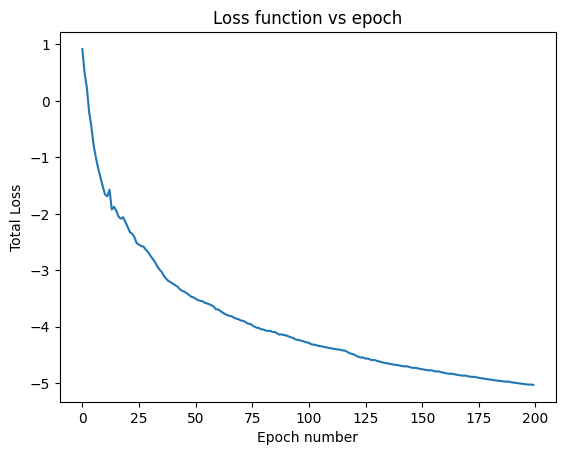

In [548]:
plt.plot(np.arange(n_epochs),np.log(loss_arr_epoch))
plt.title('Loss function vs epoch')
plt.xlabel('Epoch number')
plt.ylabel('Total Loss')
plt.show()

In [549]:
# making predictions from the learnt parameters
def predict(B_layer_1,K_layer_1,B_layer_2,K_layer_2,b,w,X_test):
    y_pred = []
    for i in range(len(X_test)):
        _,_,_,_,_,_,_,_,_,_,prob_vector = forward_feeding(X_test[i],K_layer_1,K_layer_2,B_layer_1,B_layer_2,w,b)
        y_pred.append(np.argmax(prob_vector))
    return np.array(y_pred)

In [550]:
# testing network accuracy
y_test_pred = predict(B_layer_1,K_layer_1,B_layer_2,K_layer_2,b,w,X_test)
n_correct_predictions = 0
for i in range(len(y_test_pred)):
    if y_test[i]==y_test_pred[i]:
        n_correct_predictions+=1
print('Total number of test samples :',len(X_test))
print('Total number of correct predictions :',n_correct_predictions)
print('Accuracy Score :',n_correct_predictions/len(y_test_pred))

Total number of test samples : 50
Total number of correct predictions : 38
Accuracy Score : 0.76


# What does the network see?

In [551]:
test_img_index = 0
R_arr_1, conv_imgs_1, pooled_imgs_1, R_arr_2, conv_imgs_2, pooled_imgs_2, a0_unnorm, a0_norm, Z1, a1, y_pred_vec = forward_feeding(X_test[test_img_index],K_layer_1,K_layer_2,B_layer_1,B_layer_2,w,b)

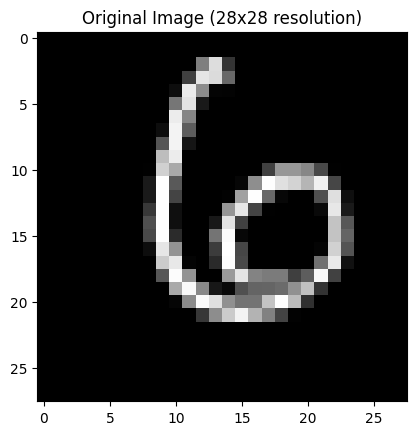

In [552]:
# original image
plt.imshow(X_test[test_img_index],cmap = 'gray')
plt.title('Original Image (28x28 resolution)')
plt.show()

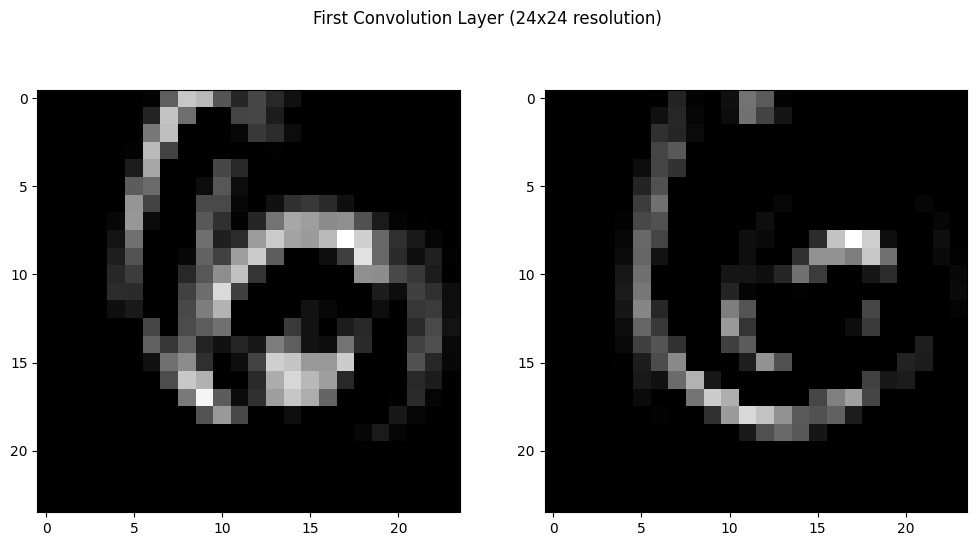

In [553]:
# first convolution layer (2 images)
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.imshow(conv_imgs_1[0],cmap = 'gray')
plt.subplot(1,2,2)
plt.imshow(conv_imgs_1[1],cmap = 'gray')
plt.suptitle('First Convolution Layer (24x24 resolution)')
plt.show()

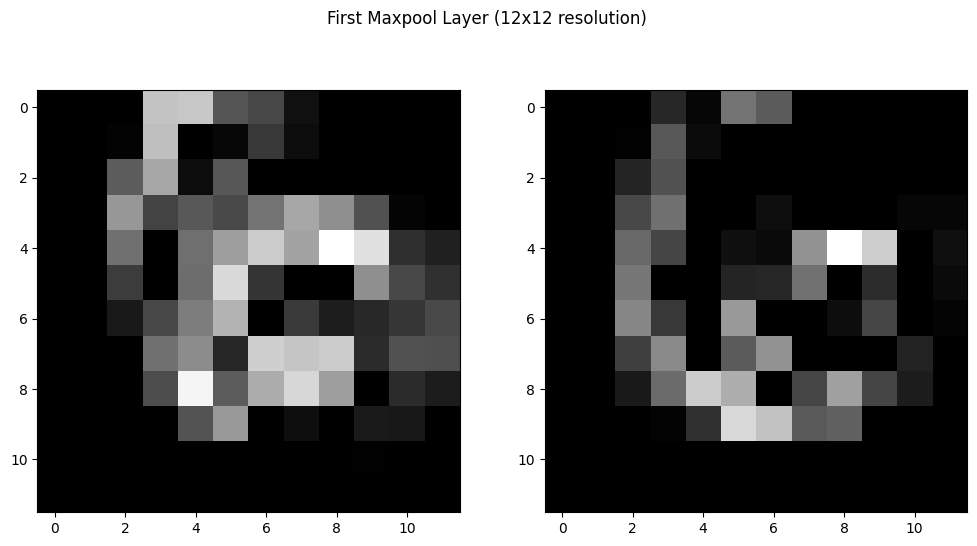

In [554]:
# first maxpool layer (2 images)
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.imshow(pooled_imgs_1[0],cmap = 'gray')
plt.subplot(1,2,2)
plt.imshow(pooled_imgs_1[1],cmap = 'gray')
plt.suptitle('First Maxpool Layer (12x12 resolution)')
plt.show()

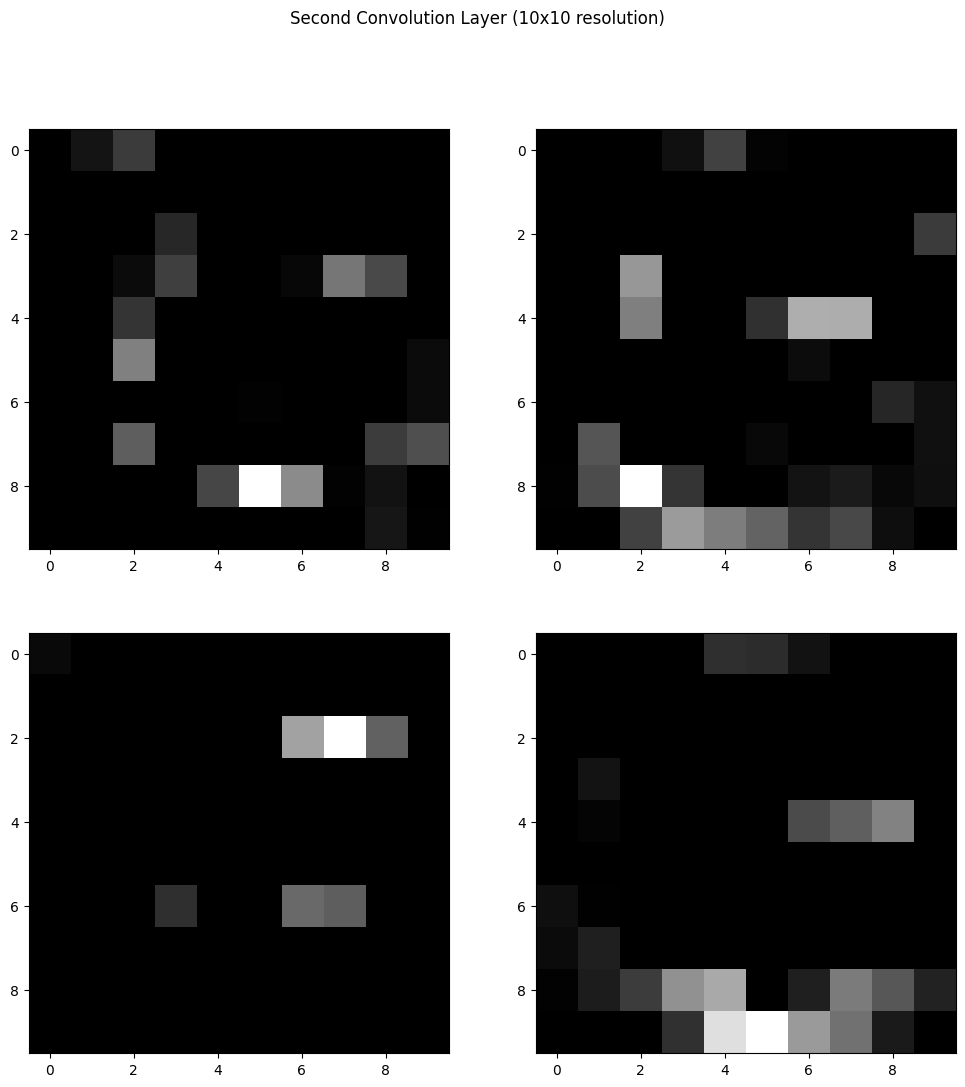

In [555]:
# second convolution layer (4 images)
plt.figure(figsize = (12,12))
plt.subplot(2,2,1)
plt.imshow(conv_imgs_2[0],cmap = 'gray')
plt.subplot(2,2,2)
plt.imshow(conv_imgs_2[1],cmap = 'gray')
plt.subplot(2,2,3)
plt.imshow(conv_imgs_2[2],cmap = 'gray')
plt.subplot(2,2,4)
plt.imshow(conv_imgs_2[3],cmap = 'gray')
plt.suptitle('Second Convolution Layer (10x10 resolution)')
plt.show()

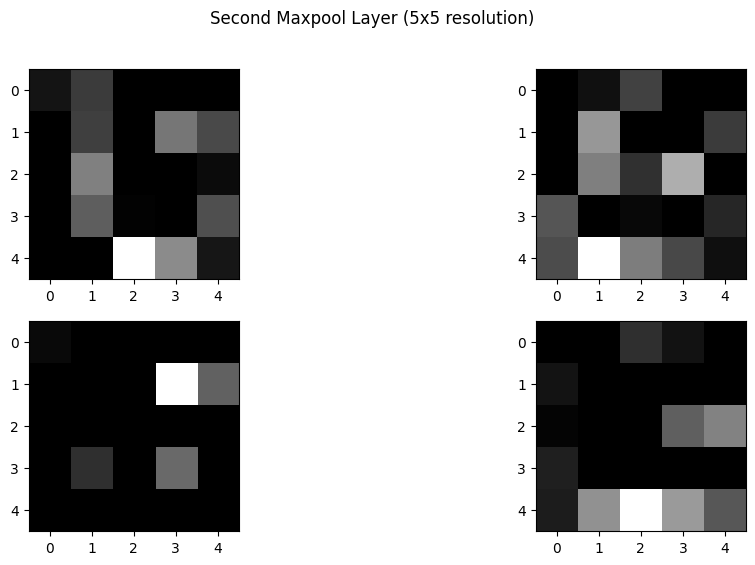

In [556]:
# second maxpool layer (4 images)
plt.figure(figsize = (12,6))
plt.subplot(2,2,1)
plt.imshow(pooled_imgs_2[0],cmap = 'gray')
plt.subplot(2,2,2)
plt.imshow(pooled_imgs_2[1],cmap = 'gray')
plt.subplot(2,2,3)
plt.imshow(pooled_imgs_2[2],cmap = 'gray')
plt.subplot(2,2,4)
plt.imshow(pooled_imgs_2[3],cmap = 'gray')
plt.suptitle('Second Maxpool Layer (5x5 resolution)')
plt.show()

In [564]:
# final probabilities
print(f'Probabilities :\n\n{y_pred_vec}')

Probabilities :

[6.14358144e-04 6.31702115e-04 4.00466643e-04 1.66271334e-05
 3.40767563e-03 6.79840212e-04 9.93729593e-01 1.09375540e-04
 4.03398639e-04 6.96275396e-06]


# Learned Parameters

In [558]:
# Filters and Biases
print(f'...................................................\nFirst Layer Kernels\n...................................................\n')
print(K_layer_1)
print('...................................................\n\n')

print(f'...................................................\nFirst Layer Biases\n...................................................\n')
print(B_layer_1)
print('...................................................\n\n')

print(f'...................................................\nSecond Layer Kernels\n...................................................\n')
print(K_layer_2)
print('...................................................\n\n')

print(f'...................................................\nSecond Layer Biases\n...................................................\n')
print(B_layer_2)
print('...................................................\n\n')


...................................................
First Layer Kernels
...................................................

[[[-0.07784918  0.20651632 -1.1784402  -1.54206946 -1.66061146]
  [ 0.67954366  0.90568336  0.0231175  -0.87029928 -2.2179527 ]
  [-0.37660347  0.34560208 -0.46061028  0.43299865  0.59383116]
  [ 1.02243802  0.60719225  0.24466103  0.77031541  2.5139214 ]
  [-0.12962355 -0.52025754 -0.1785905   0.66828624  1.39795497]]

 [[-0.76759918 -0.61988176 -0.37048711 -1.14665895 -0.03253425]
  [ 0.1793843   0.12551838 -0.10617052 -0.1142028   0.72476922]
  [-0.26573979  1.02828536  0.80421227  0.78031694 -0.04933207]
  [ 0.1083955   0.02855032  1.17132249  1.59343335  0.89852376]
  [ 0.45817923 -2.31768996 -2.64320196 -1.3883309   0.55444979]]]
...................................................


...................................................
First Layer Biases
...................................................

[0.84313119 0.35308956]
.............................